In [1]:
# Question 1:
# Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights:
# height of mother(x)/daughter (y) pairs
# Create a CSV file for the above training data and write a Python function program to find the fitted linear
# regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
# your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height
# (X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height with
# given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24
# iterations).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('q1.csv')
df

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [4]:
X = df['mother_height']
y = df['daughter_height']

In [5]:
# np.random.seed(42)

def gradient_descent(X, y, alpha, iters):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    
    for i in range(iters):
        for j in range(len(X)):
            y_pred = b1*X[j] + b0
            costs.append(np.sqrt(np.mean((y_pred - y) ** 2)))
            error = y_pred - y[j]
            b0 = b0 - alpha*error
            b1 = b1 - alpha*error*X[j]
            
    y_pred = b1*X + b0
    df['predictions'] = y_pred
    
    error = np.mean(abs(y_pred - y))
    mse = np.mean((y_pred - y) ** 2)
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    print(f"Error: {error}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    
    return b0, b1, y_pred, costs

In [6]:
b0, b1, y_pred, costs = gradient_descent(X, y, 0.0001, 4)

Error: 2.4776916070472375
MSE: 7.986089784634314
RMSE: 2.8259670529987275


In [7]:
df

,mother_height,daughter_height,predictions
0,58,60,58.882241
1,62,60,62.941730
2,60,58,60.911985
3,64,60,64.971474
4,67,70,68.016091
5,70,72,71.060708


In [8]:
# comparing sklearn model
from sklearn.linear_model import SGDRegressor

X = df[['mother_height']].values
y = df['daughter_height'].values

sgd_regressor = SGDRegressor(max_iter=4, tol=1e-3, eta0=0.0001)
sgd_regressor.fit(X, y)

sk_preds = sgd_regressor.predict(X)
df['sk_predictions'] = sk_preds

error = np.mean(abs(sk_preds - y))
mse = np.mean((sk_preds - y) ** 2)
rmse = np.sqrt(np.mean((sk_preds - y) ** 2))
print(f"Error: {error}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Error: 2.5007790660930724
MSE: 6.831417595841956
RMSE: 2.613698068989981


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
df

,mother_height,daughter_height,predictions,sk_predictions
0,58,60,58.882241,57.985550
1,62,60,62.941730,61.983473
2,60,58,60.911985,59.984511
3,64,60,64.971474,63.982434
4,67,70,68.016091,66.980876
5,70,72,71.060708,69.979318


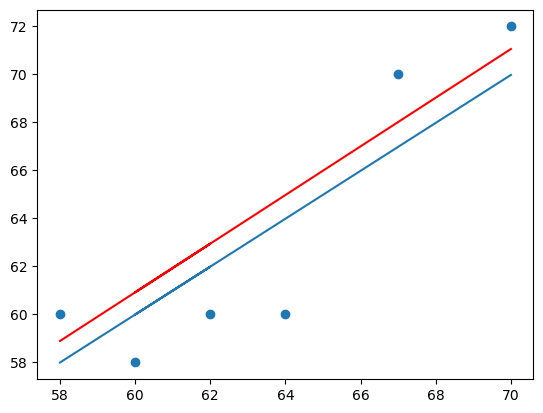

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.plot(X, sk_preds)

In [11]:
d_height = b1*63 + b0
d_height

63.956602018651985

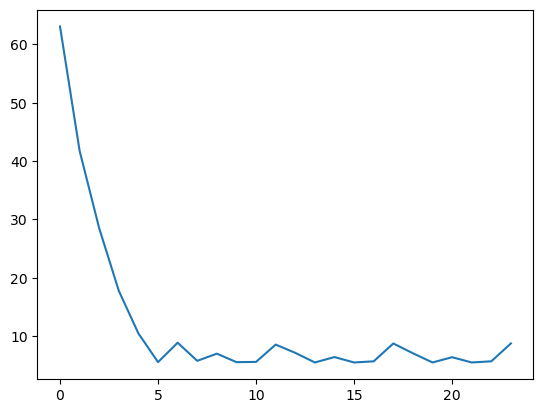

In [12]:
plt.plot(range(24), costs)

In [13]:
# Questions 2
# Create a CSV file for the above training data and write a Python function program to find the fitted logistic
# regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
# your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction
# = 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability
# that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis
# and iteration in x-axis with 3 epochs (8x3=24 iterations).

In [177]:
df = pd.read_csv('q2.csv')
df

,hours,pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [178]:
X = df['hours']
y = df['pass']

In [179]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [135]:
def gradient_descent_logistic(X, y, alpha, iters):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    
    for i in range(iters):
        for j in range(len(X)):
            y_pred = sigmoid(b1*X[j] + b0)
            error = y_pred - y[j]
            b0 = b0 - alpha*error
            b1 = b1 - alpha*error*X[j]
        y_pred = sigmoid(b1*X + b0)
        log_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        costs.append(log_loss)
            
    y_pred = sigmoid(b1*X + b0)
    df['predictions'] = y_pred
    
    y_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_class == y)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return y_pred, costs

In [156]:
preds, costs = gradient_descent_logistic(X, y, 0.01, 500)

Accuracy: 100.00%


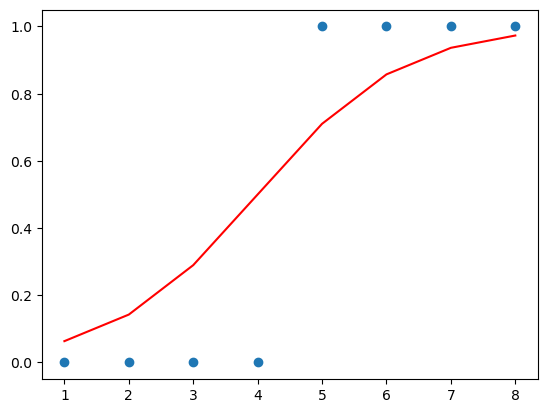

In [157]:
plt.scatter(X, y)
plt.plot(X, preds, color='red')

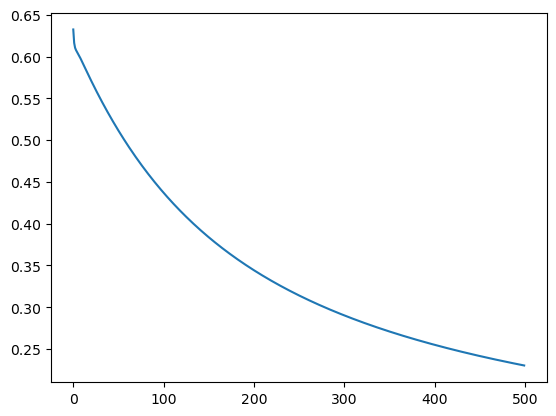

In [158]:
plt.plot(range(len(costs)), costs)

In [185]:
# Using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
X = X.to_numpy()
X = X.reshape(-1,1)
model = LogisticRegression(max_iter=1000, solver='lbfgs', C=1/0.01)
model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]
y_pred_class = model.predict(X)

log_loss_value = log_loss(y, y_pred_proba)
accuracy = accuracy_score(y, y_pred_class)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Log Loss: {log_loss_value:.4f}")

Accuracy: 100.00%
Log Loss: 0.0144


In [155]:
# Question 3:

# Consider the above dataset with two independent variables (X1 and X2) and a dependent variable (Y).
# Implement in python, how you can perform the logistic regression to model the relationship between the
# independent variables and the dependent variable.

In [166]:
df = pd.read_csv('q3.csv')
df['y'] = (df['y'] > 0).astype(int)
df

,x1,x2,y
0,4,1,1
1,2,8,0
2,1,0,1
3,3,2,0
4,1,4,0
5,6,7,0


In [167]:
X = df[['x1', 'x2']]
y = df['y']

In [171]:
def gradient_descent_logistic_multi(X, y, alpha, iters):
    X = X.to_numpy()
    m, n = X.shape
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand(n) * 0.01
    costs = []

    for i in range(iters):
        for j in range(m):
            y_pred = sigmoid(np.dot(X[j], b1) + b0)
            error = y_pred - y[j]
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * X[j]
        
        y_pred = sigmoid(np.dot(X, b1) + b0)
        log_loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        costs.append(log_loss)
    
    y_pred = sigmoid(np.dot(X, b1) + b0)
    df['predictions'] = y_pred
    
    y_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_class == y)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return y_pred, costs

In [172]:
gradient_descent_logistic_multi(X, y, 0.01, 100)

Accuracy: 100.00%


(array([7.34522134e-01, 3.08524729e-04, 6.78275069e-01, 3.48826052e-01,
        1.96855679e-02, 6.65166408e-03]),
 [0.5604567231190817,
  0.4980102628508172,
  0.46462292419489276,
  0.44320870724009803,
  0.42757410631433074,
  0.4151061639396522,
  0.4045612627299277,
  0.3952898405101513,
  0.3869264720230745,
  0.3792523265061533,
  0.3721288842136132,
  0.3654638339205349,
  0.3591925800912433,
  0.35326777566379935,
  0.34765318331885414,
  0.342319965417433,
  0.3372443822062392,
  0.33240632940536935,
  0.327788387874459,
  0.32337519197050135,
  0.31915299974044137,
  0.3151093929836187,
  0.31123306214720964,
  0.3075136474804085,
  0.3039416181008525,
  0.3005081770678222,
  0.2972051846594981,
  0.2940250946899984,
  0.29096090041243483,
  0.28800608767089764,
  0.2851545936977987,
  0.2824007704376805,
  0.27973935160080204,
  0.277165422865474,
  0.27467439479368727,
  0.2722619781238839,
  0.26992416117343665,
  0.26765718913180064,
  0.2654575450601861,
  0.263321932439